#Programación aplicada a la Electrónica y a las Telecomunicaciones
##Examen Supletorio
###24 de julio de 2023

##Ejercicio 1 (15 puntos)

**Para resolver este ejercicio deberá utilizar el paquete de álgebra computacional SymPy.**

El propósito de este ejercicio es generar aleatoriamente un sistema de $n$ ecuaciones lineales y, luego, tratar de encontrar una solución para este sistema. El script empezará solicitando al usuario que ingrese el número de ecuaciones que conforman el sistema ($n$). Se asumirá que en el sistema van a existir el mismo número de variables que de ecuaciones. Los coeficientes de cada una de las $n$ ecuaciones serán números enteros aleatorios en el intervalo $[-10, 10]$. Cada una de las $n$ ecuaciones se representará como una ecuación de SymPy. La expresión algebraica de cada ecuación la podrá generar como un string y luego convertir el string en una expresión de SymPy utilizando la función `sympify()`. Por ejemplo, para convertir la expresión algebraica de la ecuación $3x + 7y = 12$ a una expresión de SymPy, podría utilizar las siguientes instrucciones:

In [3]:
import sympy as sp

lside = '3*x + 7*y'
rside = '12'
eq1 = sp.Eq(sp.sympify(lside), sp.sympify(rside))
print(eq1)

Eq(3*x + 7*y, 12)


Se deberá intentar resolver el sistema de ecuaciones usando funciones de de SymPy (Nota: Para sistemas de más de 2 ecuaciones generados de esta manera es extremadamente improbable que exista una solución. De todas formas, su script debe intentar encontrarla mediante la funcionalidad de SymPy). Una vez que se haya encontrado o no la solución al sistema y se la haya presentado al usuario, y **sólo en el caso de que sea un sistema de únicamente 2 ecuaciones**, el script deberá graficar las 2 ecuaciones en el mismo plot usando colores diferentes de líneas. No se olvide de incluir una leyenda apropiada en el plot, indicando qué ecuación representa cada una de las rectas graficadas.

In [25]:
import random
import matplotlib.pyplot as plt


def generar_ecuaciones_aleatorias(n):
    # Lista de posibles variables para las ecuaciones
    variables = ['x', 'y', 'z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
    lista_ecuaciones = []

    for _ in range(n):
        lado_izquierdo = []
        # Generar el lado izquierdo de la ecuacion con n terminos aleatorios
        for _ in range(n):
            variable = random.choice(variables[:n])  # Escoger una variable aleatoria de la lista
            coeficiente = random.randint(-10, 10)  # Generar un coeficiente aleatorio entre -10 y 10
            lado_izquierdo.append(f"{coeficiente}*{variable}")  # Agregar el termino a la lista
        lado_derecho = str(random.randint(-10, 10))  # Generar el valor del lado derecho aleatorio
        ecuacion = sp.Eq(sp.sympify(' + '.join(lado_izquierdo)), sp.sympify(lado_derecho))
        lista_ecuaciones.append(ecuacion)  # Agregar la ecuacion a la lista

    return lista_ecuaciones


def resolver_sistema(lista_ecuaciones):
    # Definir simbolos para las variables desconocidas
    variables = sp.symbols('x y z a b c d e f g h')
    # Resolver el sistema de ecuaciones y obtener la solucion
    solucion = sp.solve(lista_ecuaciones, variables)

    return solucion


def graficar_ecuaciones(lista_ecuaciones):
    if len(lista_ecuaciones) != 2:
        print("\nLa grafica solo esta disponible para 2 ecuaciones.\n")
        return

    x = sp.Symbol('x')
    # Obtener las ecuaciones despejadas para 'y' a partir de la lista de ecuaciones
    ecuaciones = [sp.solve(ec, x)[0] for ec in lista_ecuaciones]
    # Generar valores de 'x' en el rango de -10 a 10
    valores_x = [i for i in range(-10, 11)]
    # Calcular los valores de 'y' para cada ecuación y valor de 'x'
    valores_y = [[ec.subs('x', val) for val in valores_x] for ec in ecuaciones]

    # Graficar las ecuaciones en un mismo grafico
    plt.plot(valores_x, valores_y[0], label='Ecuacion 1')
    plt.plot(valores_x, valores_y[1], label='Ecuacion 2')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()



n = int(input("\nIngresa el numero de ecuaciones del sistema (n): "))
lista_ecuaciones = generar_ecuaciones_aleatorias(n)

for ec in lista_ecuaciones:
    print(ec)

solucion = resolver_sistema(lista_ecuaciones)
print("\nSolucion:")
for variable, valor in solucion.items():
    print(f"{variable}: {valor}")

if len(lista_ecuaciones) == 2:
    print(f"\nGrafica para el sistema de 2 ecuaciones: \n\n")
    graficar_ecuaciones(lista_ecuaciones)

Eq(20*z, -5)
Eq(11*b - y, -8)
Eq(-6*a - 8*x + 7*y - 3*z, -9)
Eq(a + y + 11*z, 6)
Eq(-a + 9*z, -8)

Solucion:
x: -15/32
y: 3
z: -1/4
a: 23/4
b: -5/11


##Ejercicio 2 (15 puntos)

Suponga que se tiene un grafo densamente conectado en el que cada arco se asocia con una distancia, como se muestra en el siguiente ejemplo:

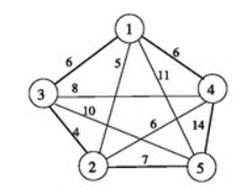

Suponga que se desea encontrar una ruta que empiece desde cualquier nodo y visite todos los otros nodos asegurándose de que la distancia recorrida es la mínima posible. La distancia recorrida, o longitud de la ruta, se calcula sumando las distancias de los arcos individuales que se atraviesan. Encontrar la ruta de longitud mínima es un problema de optimización combinatoria bastante complejo de resolver. En este ejercicio no vamos a garantizar la determinación de una ruta mínima, pero vamos a tratar de encontrar una ruta “razonablemente buena”. Para ello, vamos a aplicar una técnica muy simple conocida como “el vecino más cercano”.

El script va a empezar solicitando al usuario que indique en qué nodo se desea empezar el recorrido. A continuación, basándose en la técnica del “vecino más cercano”, el segundo nodo a visitar será el que se encuentre a la menor distancia del primer nodo. El tercer nodo por visitar será el más cercano al segundo, y así sucesivamente, hasta que se hayan visitado todos los nodos del grafo. Evidentemente, no está permitido visitar más de una vez cada nodo. Su script deberá funcionar para cualquier grafo densamente conectado, sin importar el número de nodos que contenga. Si su script funciona sólo con un grafo determinado, por ejemplo, si sólo funciona con el grafo del ejemplo, no recibirá calificación en este ejercicio.

Una vez recorridos todos los nodos, el script deberá mostrar la ruta recorrida (secuencia en que se visitaron los nodos) y la longitud total de la ruta.

Las distancias entre cada pareja de nodos se proveerán en forma de una matriz de distancias. La matriz de distancias correspondiente al grafo del ejemplo se vería de la siguiente manera:

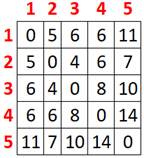

El script deberá empezar leyendo la matriz de distancias desde un archivo CSV.

In [26]:
import pandas as pd

def vecino_mas_cercano(matriz_distancias, nodo_inicio):
    num_nodos = len(matriz_distancias)
    visitados = [False] * num_nodos
    ruta = [nodo_inicio]  # Iniciar la ruta con el nodo de inicio
    nodo_actual = nodo_inicio
    distancia_total = 0

    visitados[nodo_inicio] = True  # Marcar el nodo de inicio como visitado

    for _ in range(num_nodos - 1):
        distancia_minima = float('inf')
        siguiente_nodo = None

        # Encontrar el nodo no visitado mas cercano al nodo actual
        for nodo in range(num_nodos):
            if not visitados[nodo] and matriz_distancias[nodo_actual][nodo] < distancia_minima:
                distancia_minima = matriz_distancias[nodo_actual][nodo]
                siguiente_nodo = nodo

        ruta.append(siguiente_nodo)  # Agregar el siguiente nodo a la ruta
        visitados[siguiente_nodo] = True  # Marcar el siguiente nodo como visitado
        nodo_actual = siguiente_nodo  # Actualizar el nodo actual
        distancia_total += distancia_minima  # Acumular la distancia minima a la distancia total recorrida

    # Calcular la distancia de regreso al nodo de inicio para cerrar el ciclo
    distancia_total += matriz_distancias[nodo_actual][nodo_inicio]

    return ruta, distancia_total


def main():
    archivo_distancias = "distancias.csv"
    df = pd.read_csv(archivo_distancias, header=None)
    matriz_distancias = df.values.tolist()

    # Crear una lista con los nodos disponibles [1, 2, ..., num_nodos]
    nodos = [i for i in range(1, len(matriz_distancias) + 1)]
    nodo_inicio = int(input(f"Elige el nodo de inicio entre {nodos}: "))

    if nodo_inicio not in nodos:
        print("El nodo de inicio no es válido.")
        return

    # Llamar a la funcion 'vecino_mas_cercano' para encontrar la ruta y la distancia total
    ruta, distancia_total = vecino_mas_cercano(matriz_distancias, nodo_inicio - 1)

    # Mostrar los resultados de la ruta y la distancia total
    print("\nRuta recorrida:")
    print(" -> ".join(str(nodo+1) for nodo in ruta))  # Sumar 1 para volver a los indices originales
    print(f"\nLongitud total de la ruta: {distancia_total}")



main()


Ruta recorrida:
5 -> 2 -> 3 -> 1 -> 4

Longitud total de la ruta: 37
